## Weight Prediction using Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv('encodeDone.csv')
data.head()

,Unnamed: 0,Gender,Height,Weight
0,0,1,73.847017,241.893563
1,1,1,68.781904,162.310473
2,2,1,74.110105,212.740856
3,3,1,71.730978,220.042470
4,4,1,69.881796,206.349801


In [48]:
data = data.drop(columns='Unnamed: 0')

In [23]:
data.shape

(10000, 3)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  int64  
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,10000.0,0.500000,0.500025,0.000000,0.000000,0.500000,1.000000,1.000000
Height,10000.0,66.367560,3.847528,54.263133,63.505620,66.318070,69.174262,78.998742
Weight,10000.0,161.440357,32.108439,64.700127,135.818051,161.212928,187.169525,269.989699


In [26]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [27]:
data['Gender'].value_counts()

1    5000
0    5000
Name: Gender, dtype: int64

1 = Male

0 = Female

<AxesSubplot: xlabel='Height', ylabel='Weight'>

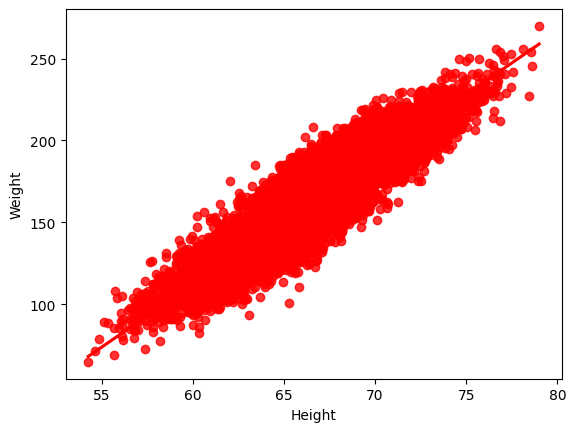

In [64]:
sns.regplot(x = 'Height', y = 'Weight', data = data, color='red')

### Declare Datase

In [49]:
x = data.drop(columns='Gender').values
y = data['Weight'].values

### Split Dataset

In [50]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [31]:
x_train.shape

(7500, 2)

In [32]:
x_test.shape

(2500, 2)

### LinReg Model

In [33]:
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [53]:
y_pred = model.predict(x_test)
y_pred

array([173.11581259, 195.1620421 , 170.21745116, ..., 123.86243002,
       165.32489928, 163.10800221])

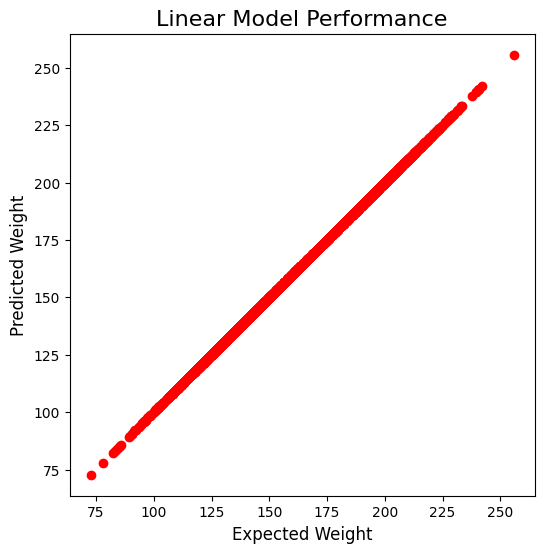

In [57]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, model.predict(x_test), color = 'red')

plt.title('Linear Model Performance', fontsize = 16)
plt.xlabel('Expected Weight', fontsize = 12)
plt.ylabel('Predicted Weight', fontsize = 12)

plt.show()

## Uji Kedua

In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model1 = make_pipeline(StandardScaler(), LinearRegression())
model1.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

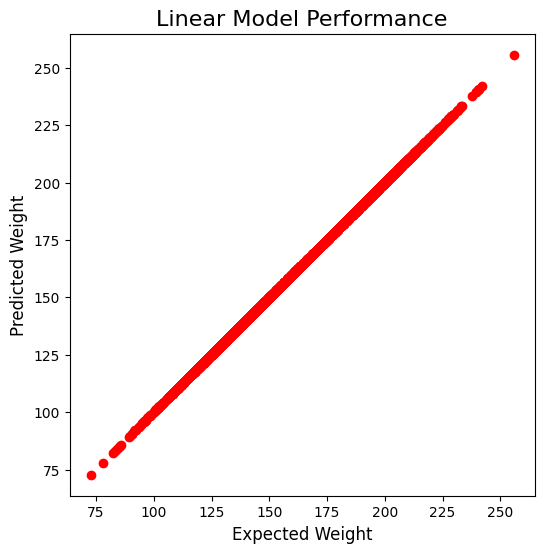

In [59]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, model1.predict(x_test), color = 'red')

plt.title('Linear Model Performance', fontsize = 16)
plt.xlabel('Expected Weight', fontsize = 12)
plt.ylabel('Predicted Weight', fontsize = 12)

plt.show()

## Uji Ketiga

In [61]:
X = data.loc[:, ['Height', 'Gender']].values
y = data.loc[:, 'Weight'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [62]:
model.score(x_train, y_train)

1.0

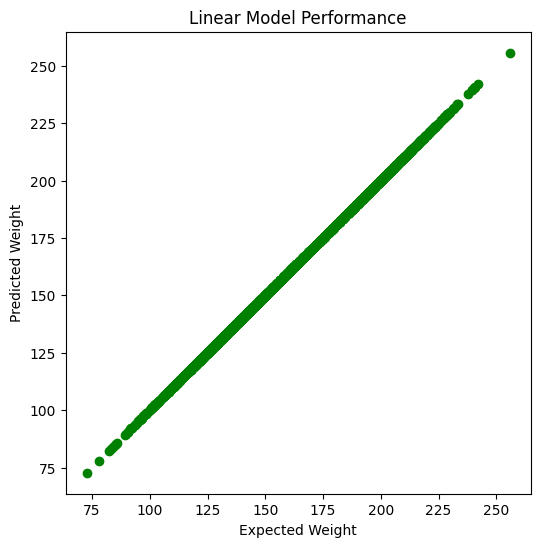

In [63]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, model.predict(x_test), color = 'green')
plt.title('Linear Model Performance', fontsize = 12)
plt.xlabel('Expected Weight', fontsize = 10)
plt.ylabel('Predicted Weight', fontsize = 10)

plt.show()